This first function, Random_Preferences_Tables is a function that produces preference tables at complete random from two independent sets, X and Y. This function gets used later.

In [5]:
from itertools import permutations
import random

def Random_Preference_Tables(X,Y):
    n=len(X)
    table_1 = dict()
    table_2 = dict()
    
    for x in X:
        table_1[x]=random.sample(Y,n)

    for y in Y:
        table_2[y]=random.sample(X,n)

    return(dict(table_1),dict(table_2))

The function New_preferences is used in the Fundamental Algorithm to add the undesirable man 'Z' to the end of each woman's preference list.

In [1]:
def New_preferences(B):
    
    for i in list(B.keys()):
        B[i].append('Z')
    return(B)

This is the Fundamental Algorithm, which I made for the STOR 601 Python Assignment. It takes two sets of preference tables an produces a stable matching between the members of each table.

In [2]:
def Fundamental_Algorithm(A,B):
    
    New_preferences(B)
    n=len(B)

    matchings=dict()
    k=0
    for j in list(B.keys()):
        matchings[j]=B[j][n]
        
    while k<n:
        X=list(A.keys())[k]
        while X!='Z':
            x=A[X][0]
            if B[x].index(X)<B[x].index(matchings[x]):
                Y=matchings[x]
                matchings[x]=X
                X=Y
            if X!='Z':
                A[X].remove(x)
        k=k+1
    
    return(matchings)

The Fundamental_Algorithm_Timing is a function that gives the average time it takes for the Fundamental Algorithm to work with preference tables of different sizes, by running it 1,000,000 times.

In [3]:
import time
import random

def Fundamental_Algorithm_Timing(X,Y):
    times=list()
    for j in range(len(X)-1):
        X_1=X[0:j+2]
        Y_1=Y[0:j+2]
        random.seed(12345)
        Z=Random_Preference_Tables(X_1,Y_1)
        table_1=Z[0]
        table_2=Z[1]
        start = time.perf_counter()
        for i in range(1000000) :
            Fundamental_Algorithm(table_1,table_2)
        end = time.perf_counter()
        t=(end-start)/1000000
        times.append(t)
    return(times)

Set X is the set of men's names, and Y is the set of women's names.

In [6]:
X=['A','B','C','D','E','F','G','H','I','J']
Y=['a','b','c','d','e','f','g','h','i','j']

T=Fundamental_Algorithm_Timing(X,Y)

In [7]:
Y_1=[6.269/1000000, 9.332/1000000,15.219/1000000,19.302/1000000,20.440/1000000,39.251/1000000,44.292/1000000,54.739/1000000,57.525/1000000]
Y_2=[4.493/1000000, 6.789/1000000,11.781/1000000,15.041/1000000,15.496/1000000,33.441/1000000,37.102/1000000,46.325/1000000,48.122/1000000]

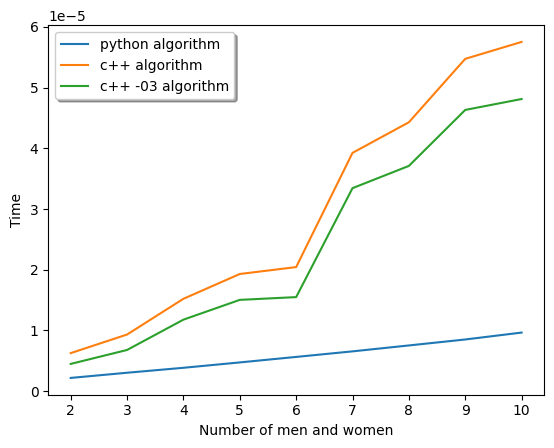

In [11]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.arange(2,len(X)+1,1)
y_1points = np.array(T)
y_2points = np.array(Y_1)
y_3points = np.array(Y_2)

plt.plot(xpoints, y_1points,label="python algorithm")
plt.plot(xpoints, y_2points,label="c++ algorithm")
plt.plot(xpoints, y_3points,label="c++ -03 algorithm")
legend = plt.legend(loc='upper left', shadow=True, fontsize='medium')
plt.xlabel("Number of men and women")
plt.ylabel("Time")

plt.show()

The graph above plots the amount of time it takes for the 3 different Fundamental Algorithm methods to run when they take in preference tables with different amounts of men and women. It shows that my python algorithm works quicker than my c++ algorithm. By including -03 in the g++ commands, the graph shows that helps to decrease the running time of the Fundamental Algorithm than when it runs without the -03 being included.
    The random.seed(12345) ensures that the preference tables were all the same, and those same tables were used for the c++ algorithm results so they results were consistent. It is important to note that since the results are only for one certain set of preference tables, the results for a different example may not be the same as this, or follow the same trend.